# Dimensional Reduction and Visualization
This notebook collects and explores the benchmark datasets and generators available in the sklearn library.  The intention of this exploration is to build intuition for the shape of high dimensional data.  The present version of this note is incomplete, and should be supplimented with questions, comments, editorial and sample code.

In [1]:
from time import time

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import check_random_state

%matplotlib inline

/home/ian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Datasets
These are the [benchmark](http://scikit-learn.org/stable/datasets/index.html#datasets) datasets provided in [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) machine learning API.

In [2]:
from sklearn import datasets as ds

### Handwritten Digits
This seems to be a downsampled version of MNIST with local averaging (4x4 -> 1x1).

In [3]:
digits = ds.load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

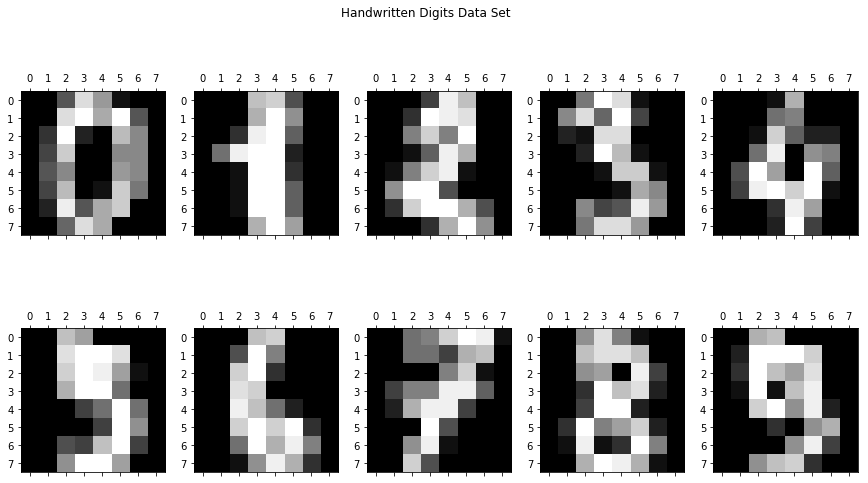

In [4]:
plt.gray()

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Handwritten Digits Data Set")
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i)
    ax.matshow(digits.images[i]) 
plt.show() 

### MNIST

In [5]:
(mnist_train, mnist_label_train), (mnist_test, mnist_label_test)  = tf.keras.datasets.mnist.load_data()
print(mnist_train.shape)
print(mnist_test.shape)
print(mnist_label_train.shape)
print(mnist_label_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


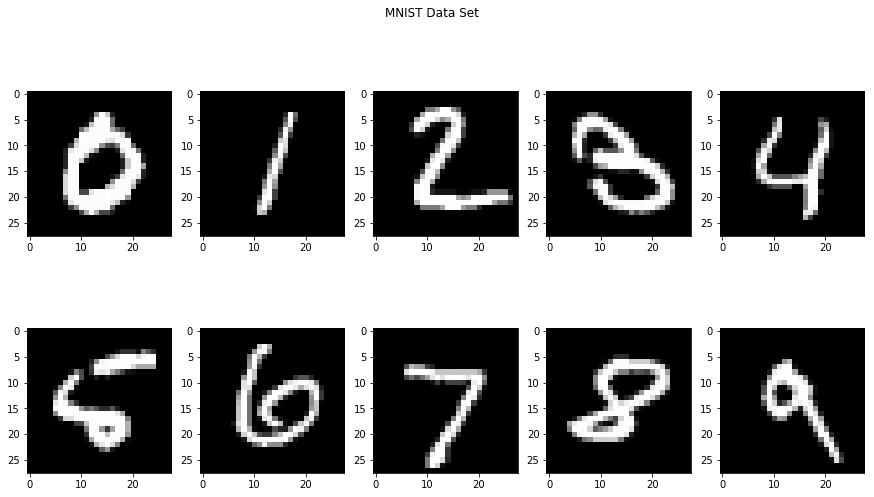

In [6]:
plt.figure(figsize=(15,8))
plt.suptitle("MNIST Data Set")
for i in range(10):
    ax = plt.subplot(2,5, 1+i)
    ix = np.where(mnist_label_test==i)[0][0]
    plt.imshow(mnist_test[ix].reshape(28,28))
    plt.gray()
plt.show()

### Fashion MNIST

In [7]:
(fashion_mnist_train, fashion_mnist_label_train), (fashion_mnist_test, fashion_mnist_label_test)  = tf.keras.datasets.fashion_mnist.load_data()
print(fashion_mnist_train.shape)
print(fashion_mnist_test.shape)
print(fashion_mnist_label_train.shape)
print(fashion_mnist_label_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


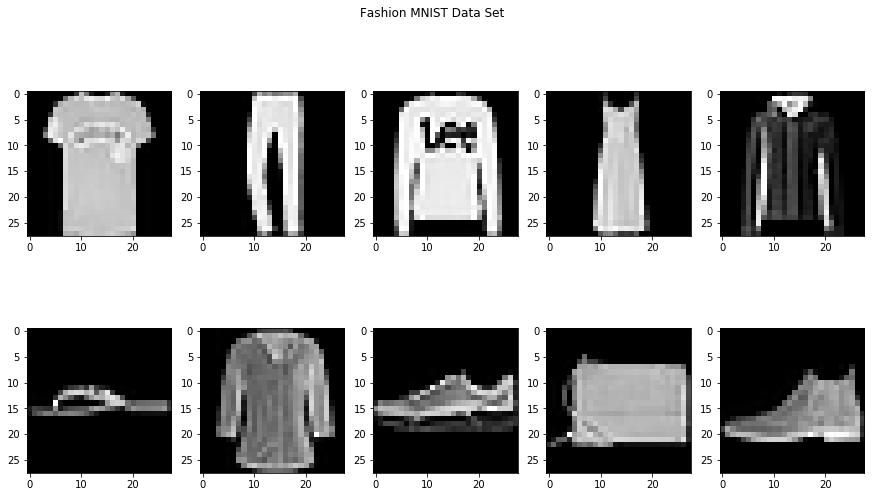

In [8]:
plt.figure(figsize=(15,8))
plt.suptitle("Fashion MNIST Data Set")
for i in range(10):
    ax = plt.subplot(2,5, 1+i)
    ix = np.where(fashion_mnist_label_test==i)[0][0]
    plt.imshow(fashion_mnist_test[ix].reshape(28,28))
    plt.gray()
plt.show()

### Iris

In [9]:
iris = ds.load_iris()
print(iris.data.shape)

(150, 4)


In [10]:
pd.DataFrame(iris.data).head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

### Wine

In [11]:
wine = ds.load_wine()
print(wine.data.shape)

(178, 13)


In [12]:
pd.DataFrame(wine.data).head()

0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0

### SUN360 
This is a dataset of [panorama images](http://people.csail.mit.edu/jxiao/SUN360/), and contains natural feature space cycles.  The maintainence of these cycles after dimensional reduction provide us with a crude [topological fidelity](http://math.uchicago.edu/~shmuel/AAT-readings/Data%20Analysis%20/mumford-carlsson%20et%20al.pdf) index.

## Data Augmentation

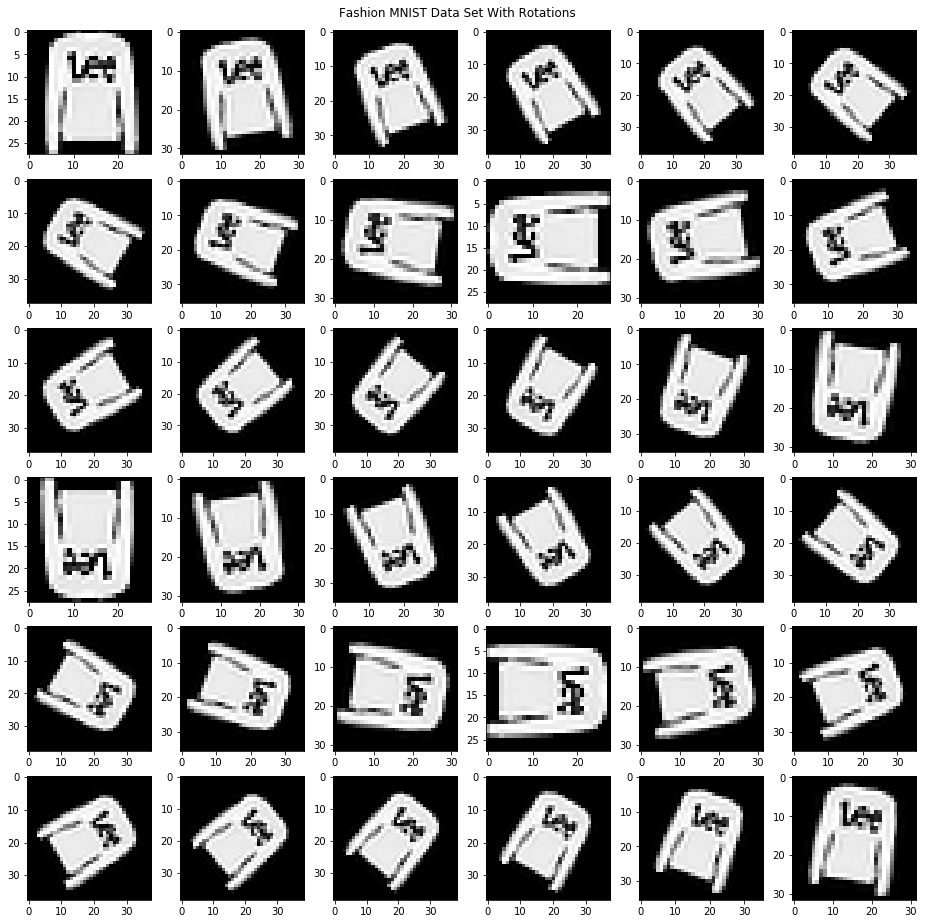

In [82]:
from scipy.ndimage.interpolation import rotate
plt.figure(figsize=(16,16))
plt.suptitle("Fashion MNIST Data Set With Rotations", y=0.9)

for i in range(36):
    ax = plt.subplot(6,6, 1+i)
    ix = np.where(fashion_mnist_label_test==2)[0][0]
    plt.imshow(rotate(fashion_mnist_test[ix].reshape(28,28), 10*i))
    plt.gray()
plt.show()

## Data Generators
These are the [toy-distribution](http://scikit-learn.org/stable/datasets/index.html#sample-generators) generators provided in the [sklearn](http://scikit-learn.org/stable/modules/classes.html#samples-generator) machine learning API, and data randomly sampled from parametric distributions.

### sklearn 3D

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
S, S_color = ds.make_s_curve(1000, random_state=0)
R, R_color = ds.make_swiss_roll(1000, random_state=0)

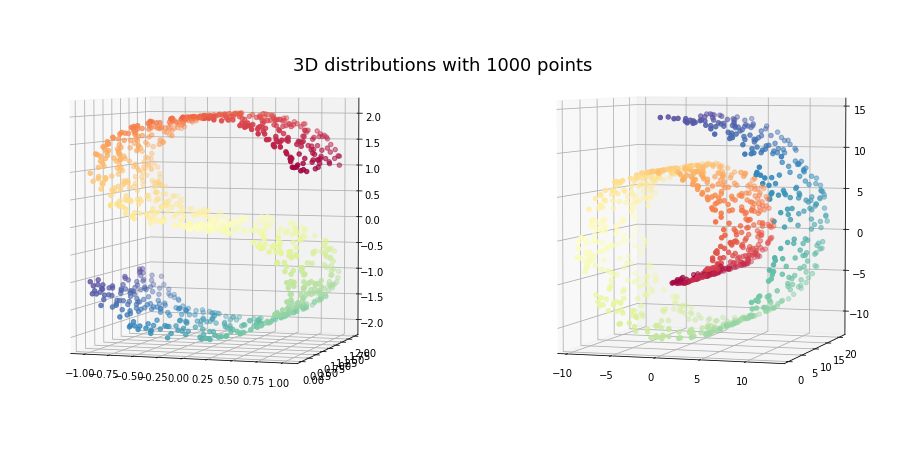

In [15]:
fig = plt.figure(figsize=(16, 8))
plt.suptitle("3D distributions with %i points"
             % 1000, fontsize=18, y=0.8)

for (X,color,i) in [(S, S_color, 1), (R, R_color, 2)]:
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
plt.show()

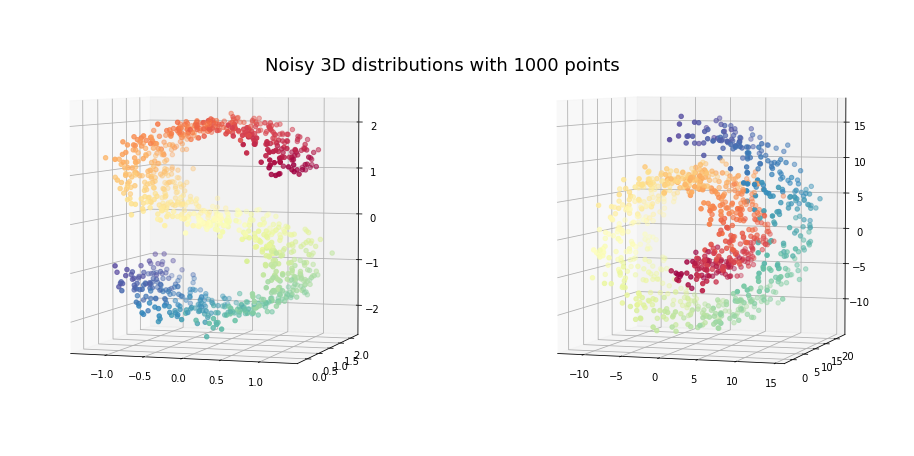

In [16]:
fig = plt.figure(figsize=(16, 8))
plt.suptitle("Noisy 3D distributions with %i points"
             % 1000, fontsize=18, y=0.8)

for (X,color,i) in [(np.random.normal(S, 0.1), S_color, 1), (np.random.normal(R, 1), R_color, 2)]:
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
plt.show()

### sklearn High Dimensional

In [17]:
B, B_color = ds.make_blobs(1000, n_features=3,
                           centers=10, random_state=0)

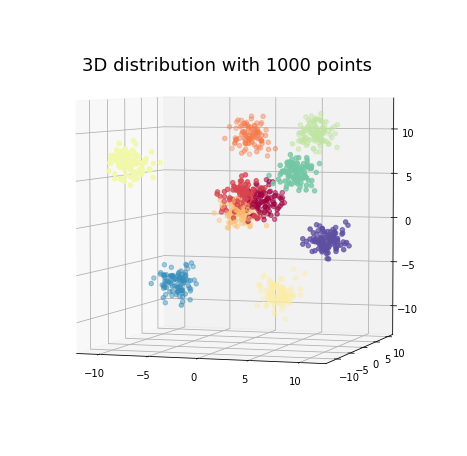

In [18]:
fig = plt.figure(figsize=(8, 8))
plt.suptitle("3D distribution with %i points"
             % 1000, fontsize=18, y=0.8)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(B[:, 0], B[:, 1], B[:, 2], c=B_color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

Note that make_blobs is already a noisy embedding of (in this case) ten points, we can of course re-noise it, however I believe that this is also possible on the generator level. Consider removing this cell.

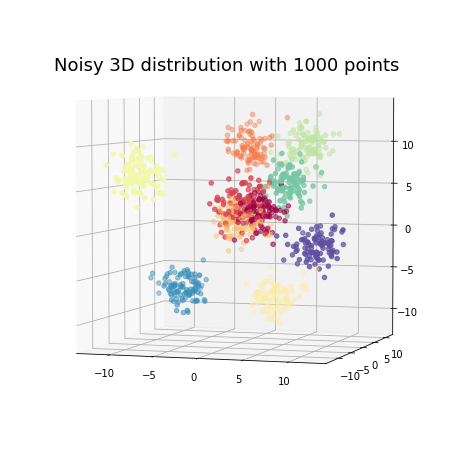

In [19]:
fig = plt.figure(figsize=(8, 8))
plt.suptitle("Noisy 3D distribution with %i points"
             % 1000, fontsize=18, y=0.8)
NB = np.random.normal(B, 1)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(NB[:, 0], NB[:, 1], NB[:, 2], c=B_color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

### Parametric 3D

In [20]:
def sphere(n_samples, noise=0, uniform=False):
    
    if uniform:
        p = np.linspace(0,60*np.pi, n_samples)
        t = np.linspace(0,14*np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        p = random_state.rand(n_samples) * (2 * np.pi)
        t = random_state.rand(n_samples) * np.pi
    color = np.cos(t)
    x, y, z = np.sin(t) * np.cos(p), \
        np.sin(t) * np.sin(p), \
        np.cos(t)
    X = np.array([x, y, z]).T
    
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

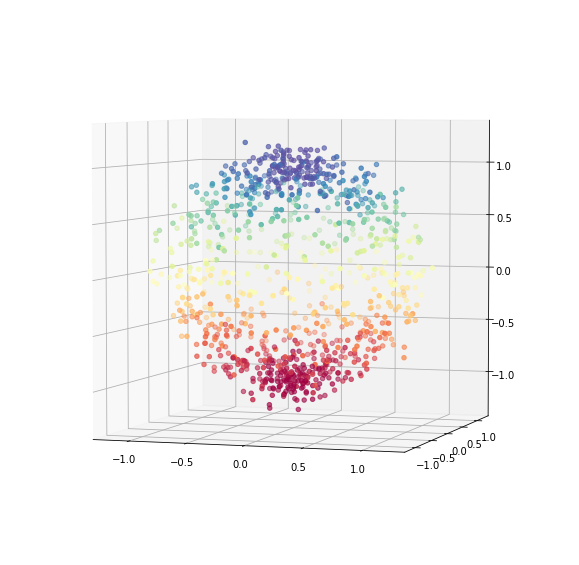

In [21]:
fig = plt.figure(figsize=(10, 10))

X, color = sphere(1000, noise=0.1, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

In [22]:
# Sphere with poles removed
def globe(n_samples, noise=0, uniform=False):

    if uniform:
        p = np.linspace(0,60*np.pi, n_samples)
        t = np.linspace(0,14*np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        p = random_state.rand(n_samples) * (2 * np.pi)
        t = random_state.rand(n_samples) * np.pi

    # Sever the poles from the sphere.
    indices = ((np.cos(t)<0.92) & (np.cos(t) > -0.92))
    color = p[indices] % (np.pi)
    x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
        np.sin(t[indices]) * np.sin(p[indices]), \
        np.cos(t[indices])
    X = np.array([x, y, z]).T
    
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

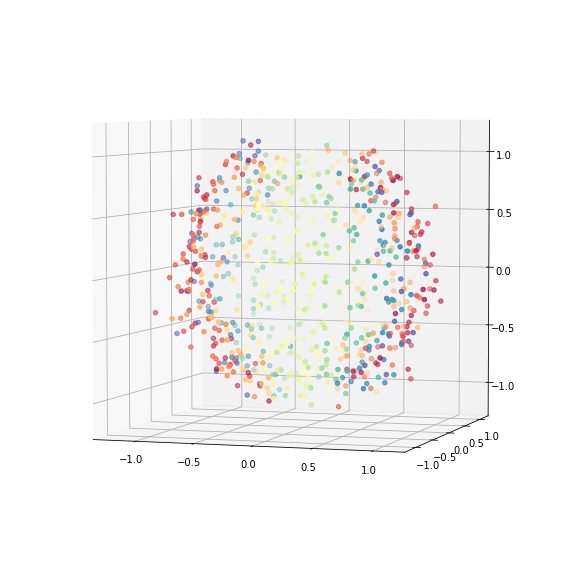

In [23]:
fig = plt.figure(figsize=(10, 10))

X, color = globe(1000, noise=0.1, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

In [24]:
def torus(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        phi = np.linspace(0, 26 * np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (2 * np.pi)
        phi = random_state.rand(n_samples) * (2 * np.pi)
    r1 = 2
    r2 = 0.5
    x = np.ravel((r1 + r2 * np.cos(phi)) * np.cos(theta))
    y = np.ravel((r1 + r2 * np.cos(phi)) * np.sin(theta))
    z = np.ravel(r2 * np.sin(phi))
    color = theta % (2*np.pi)
    X = np.array([x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

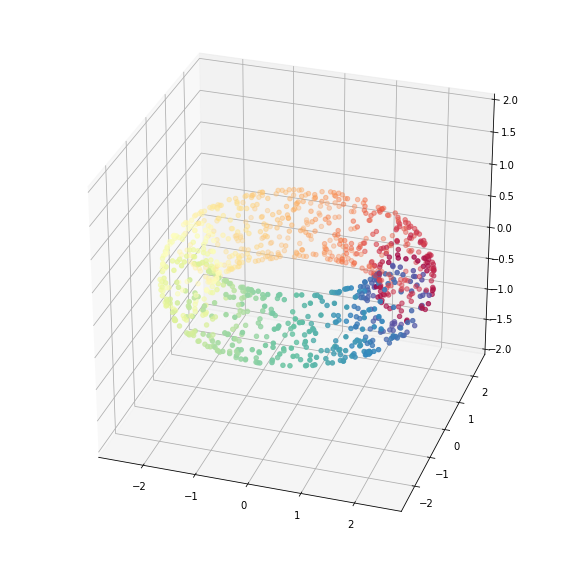

In [25]:
fig = plt.figure(figsize=(10, 10))

X, color = torus(1000, noise=0, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(30, -72)
ax.set_zlim3d(-2, 2)

plt.show()

We generate the mobius band by rotating a line segment along a circle and smoothly performing a half twist.

In [26]:
def mobius_strip(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        w = np.linspace(-0.25, 0.25, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (2 * np.pi)
        w = random_state.rand(n_samples) * 0.5 - 0.25
    phi = 0.5 * theta
    # radius in x-y plane
    r = 1 + w * np.cos(phi)

    x = np.ravel(r * np.cos(theta))
    y = np.ravel(r * np.sin(theta))
    z = np.ravel(w * np.sin(phi))
    color = theta % (2*np.pi)
    X = np.array([x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

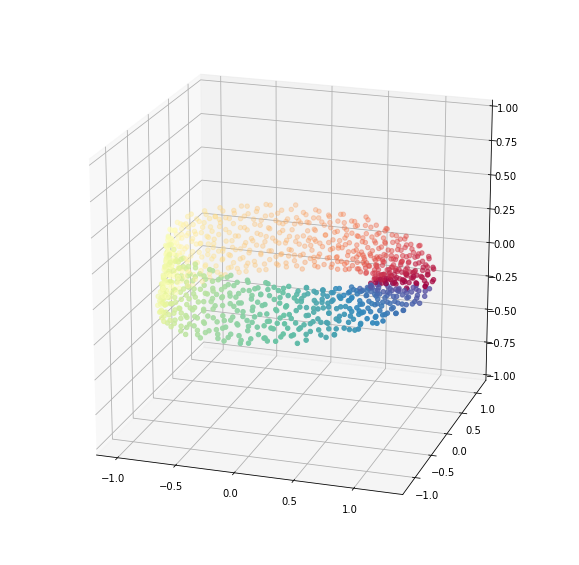

In [27]:
fig = plt.figure(figsize=(10, 10))

X, color = mobius_strip(1000, noise=0.01, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.view_init(20, -72)
ax.set_zlim3d(-1, 1)
plt.show()

We can generate toroidal knots with rational curves.  A (3,2) knot loops vertically 3 times and horizontally 2 times to reproduce the trefoil knot.

In [28]:
def trefoil_knot(n_samples, noise=0, uniform=True):
    if uniform:
        phi = np.linspace(0,2*np.pi,n_samples)
    else:
        random_state = check_random_state(0)
        phi = random_state.rand(n_samples) * (2 * np.pi)
    x = np.sin(phi)+2*np.sin(2*phi)
    y = np.cos(phi)-2*np.cos(2*phi)
    z = -np.sin(3*phi)
    color = phi
    X = np.array([x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)

    return X, color

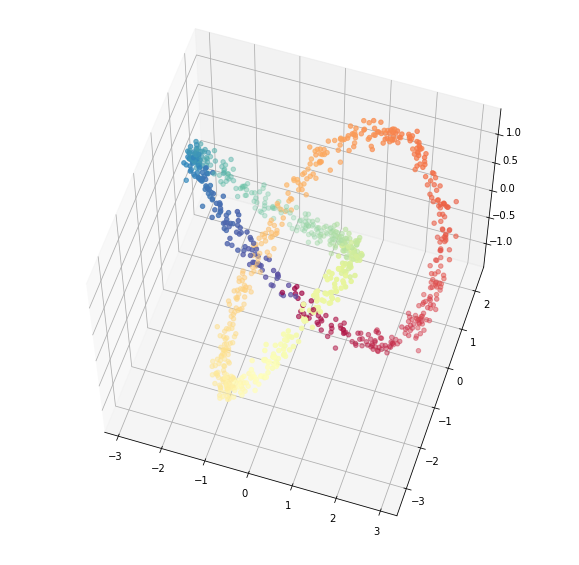

In [29]:
fig = plt.figure(figsize=(10, 10))

X, color = trefoil_knot(1000, noise=0.1, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(60, -72)
plt.show()

Matplotlib Lorenz chaotic system attractor [example](https://matplotlib.org/examples/mplot3d/lorenz_attractor.html).

In [30]:
def lorenz_attractor(n_samples, noise=0, uniform=True):
    def lorenz(x, y, z, s=10, r=28, b=2.667):
        x_dot = s*(y - x)
        y_dot = r*x - y - x*z
        z_dot = x*y - b*z
        return x_dot, y_dot, z_dot
    
    dt = 0.01
    stepCnt = 10000

    # Need one more for the initial values
    xs = np.empty((stepCnt + 1,))
    ys = np.empty((stepCnt + 1,))
    zs = np.empty((stepCnt + 1,))

    # Setting initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    # Stepping through "time".
    for i in range(stepCnt):
        # Derivatives of the X, Y, Z state
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    if uniform:
        indices = range(0, 10000, int(10000/n_samples))
    else:
        indices = np.random.choice(10000, n_samples, replace=False)
    
    color = indices
    X = np.array([xs, ys, zs]).T[indices,:]
    if noise != 0:
        X = np.random.normal(X, noise)

    return X, color

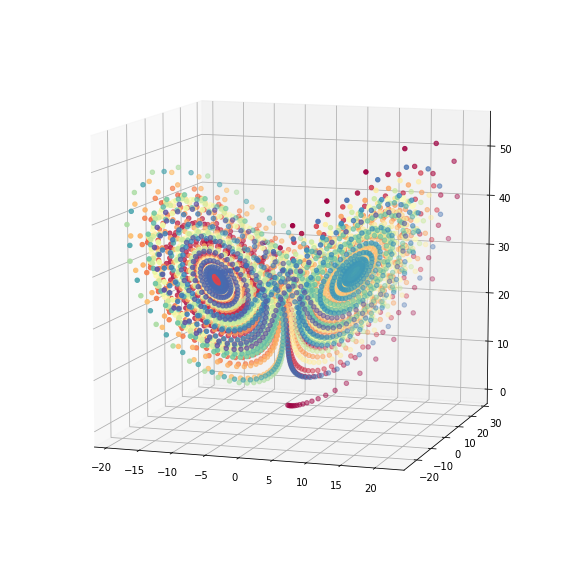

In [71]:
fig = plt.figure(figsize=(10, 10))

X, color = lorenz_attractor(5000, noise=0, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
plt.show()

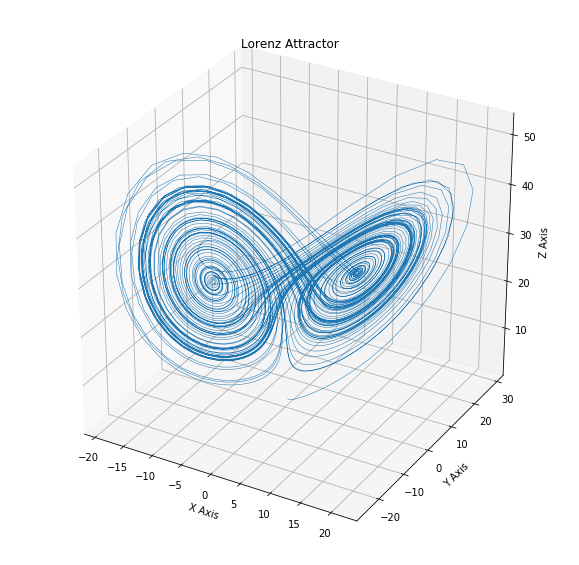

In [72]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot(X[:,0], X[:,1], X[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Rossler attractor code borrowed from [blog post](https://vedransekara.github.io/2016/11/14/strange_attractors.html).

In [33]:
def rossler_attractor(n_samples, noise=0, uniform=True):
    def rossler(x, y, z, a=0.1, b=0.1, c=14):
        x_dot = - y - z
        y_dot = x + a*y
        z_dot = b + z*(x - c)
        return x_dot, y_dot, z_dot

    # basic parameters
    dt = 0.01 
    steps = 100000

    # initialize solutions arrays (+1 for initial conditions)
    xs = np.empty((steps + 1))
    ys = np.empty((steps + 1))
    zs = np.empty((steps + 1))

    # fill in initial conditions
    xs[0], ys[0], zs[0] = (0.1, 0., 0.1)

    # solve equation system
    for i in range(steps):
        # Calculate derivatives
        x_dot, y_dot, z_dot = rossler(xs[i], ys[i], zs[i])

        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    if uniform:
        indices = range(0, 10000, int(10000/n_samples))
    else:
        indices = np.random.choice(10000, n_samples, replace=False)
    
    color = indices
    X = np.array([xs, ys, zs]).T[indices,:]
    if noise != 0:
        X = np.random.normal(X, noise)

    return X, color

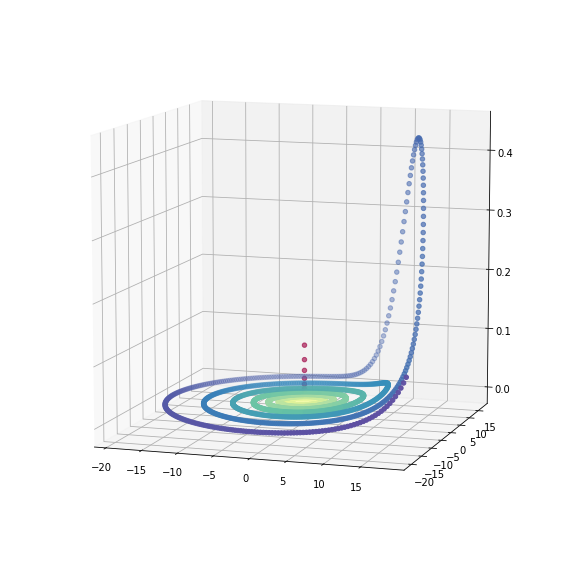

In [34]:
fig = plt.figure(figsize=(10, 10))

X, color = rossler_attractor(5000, noise=0, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
plt.show()

Thomas' cyclically symmetric attractor equations borrowed from [wikipedia](https://en.wikipedia.org/wiki/Thomas%27_cyclically_symmetric_attractor).

In [35]:
def thomas_attractor(n_samples, noise=0, uniform=True):
    def thomas(x, y, z, b=0.1):
        x_dot = np.sin(y) - b*x
        y_dot = np.sin(z) - b*y
        z_dot = np.sin(x) - b*z
        return x_dot, y_dot, z_dot

    # basic parameters
    dt = 0.05 
    steps = 100000

    # initialize solutions arrays (+1 for initial conditions)
    xs = np.empty((steps + 1))
    ys = np.empty((steps + 1))
    zs = np.empty((steps + 1))

    # fill in initial conditions
    xs[0], ys[0], zs[0] = (0.1, 0., 0.1)

    # solve equation system
    for i in range(steps):
        # Calculate derivatives
        x_dot, y_dot, z_dot = thomas(xs[i], ys[i], zs[i])

        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    if uniform:
        indices = range(0, 10000, int(10000/n_samples))
    else:
        indices = np.random.choice(10000, n_samples, replace=False)
    
    color = indices
    X = np.array([xs, ys, zs]).T[indices,:]
    if noise != 0:
        X = np.random.normal(X, noise)

    return X, color

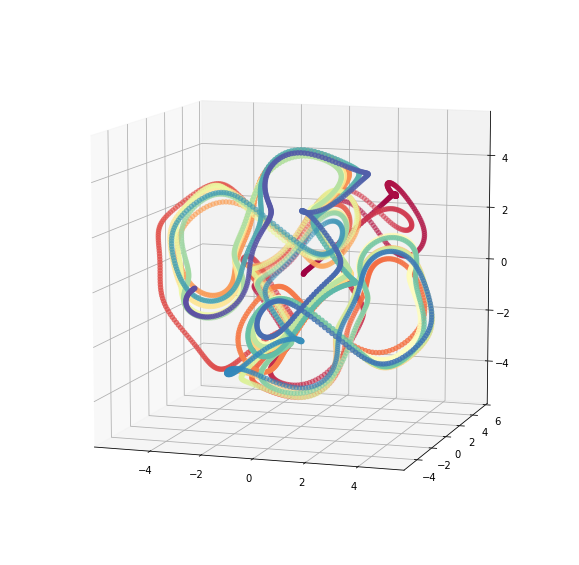

In [36]:
fig = plt.figure(figsize=(10, 10))

X, color = thomas_attractor(5000, noise=0, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
plt.show()

### Parametric High Dimensional

The Klein bottle is a non-orientable $\mathbb{R}$ $2$-manifold with minimal [embedding](https://en.wikipedia.org/wiki/Klein_bottle#4-D_non-intersecting) dimension $4$.

In [94]:
def folded_klein_bottle(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        phi = np.linspace(0, 26 * np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (2 * np.pi)
        phi = random_state.rand(n_samples) * (2 * np.pi)
    r1 = 2
    r2 = 0.6
    e  = 0.2
    w = np.ravel((r1 * (np.cos(theta/2)*np.cos(phi) - np.sin(theta/2)*np.sin(2*phi))))
    x = np.ravel((r1 * (np.sin(theta/2)*np.cos(phi) + np.cos(theta/2)*np.sin(2*phi))))
    y = np.ravel(r2 * np.cos(theta) * (1 + e * np.sin(phi)))
    z = np.ravel(r2 * np.sin(theta) * (1 + e * np.sin(phi)))
    color = theta % (2*np.pi)
    X = np.array([w, x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

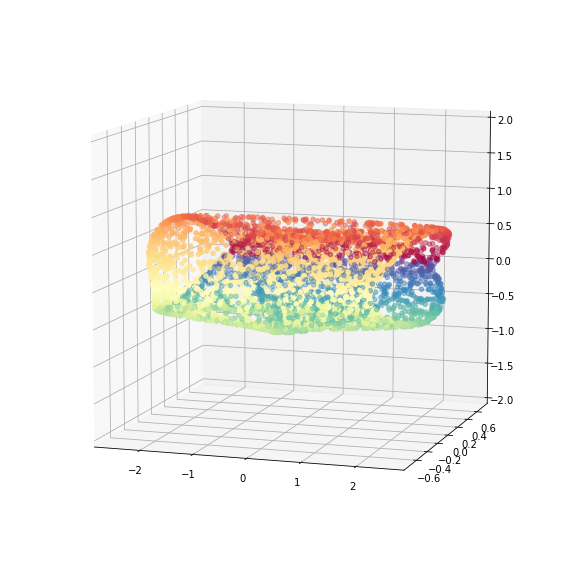

In [96]:
# plot first three variables
fig = plt.figure(figsize=(10, 10))

X, color = folded_klein_bottle(5000, noise=0, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
ax.set_zlim3d(-2, 2)
plt.show()

In [131]:
def klein_bottle(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        phi = np.linspace(0, 26 * np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (2 * np.pi)
        phi = random_state.rand(n_samples) * (2 * np.pi)

    w = np.ravel(np.cos(theta) * (1 + np.cos(theta/2)*np.sin(phi) - np.sin(theta/2)*np.sin(2*phi)/2))
    x = np.ravel(np.sin(theta) * (1 + np.cos(theta/2)*np.sin(phi) - np.sin(theta/2)*np.sin(2*phi)/2))
    y = np.ravel(np.sin(theta/2)*np.cos(phi/2) + np.cos(theta/2)*np.cos(phi)/2)
    z = np.ravel(np.sin(theta/2)*np.cos(phi) + np.sin(theta/2)*np.cos(2*phi)/2)
    color = theta % (2*np.pi)
    X = np.array([w, x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

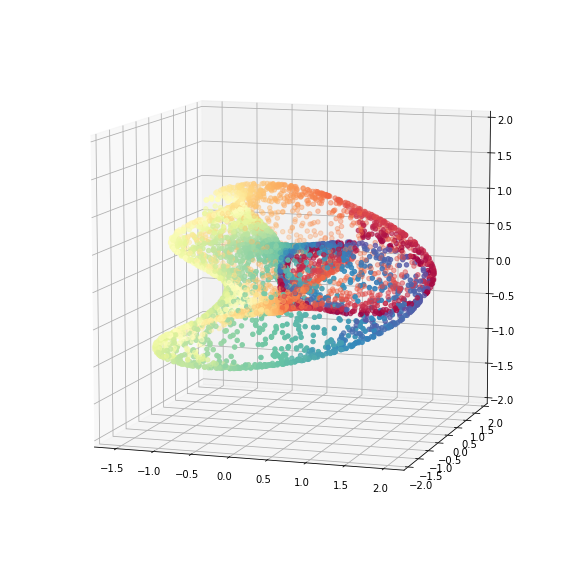

In [132]:
# plot first three variables
fig = plt.figure(figsize=(10, 10))

X, color = klein_bottle(5000, noise=0, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
ax.set_zlim3d(-2, 2)
plt.show()

In [115]:
def S3_klein_bottle(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        phi = np.linspace(0, 26 * np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (np.pi)
        phi = random_state.rand(n_samples) * (2 * np.pi)
    r1 = 2
    r2 = 0.6
    e  = 0.2
    w = np.ravel(np.cos(theta) * np.sin(phi))
    x = np.ravel(np.sin(theta) * np.sin(phi))
    y = np.ravel(np.cos(2*theta)*np.cos(phi))
    z = np.ravel(np.sin(2*theta)*np.cos(phi))
    color = theta % (2*np.pi)
    X = np.array([w, x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

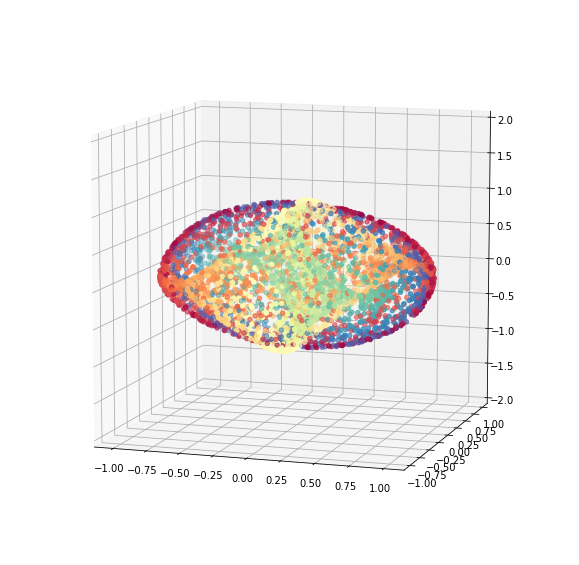

In [116]:
# plot first three variables
fig = plt.figure(figsize=(10, 10))

X, color = S3_klein_bottle(5000, noise=0, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
ax.set_zlim3d(-2, 2)
plt.show()

In [129]:
def S3_torus(n_samples, noise=0, uniform=False):
    if uniform:
        theta = np.linspace(0, 60 * np.pi, n_samples)
        phi = np.linspace(0, 26 * np.pi, n_samples)
    else:
        random_state = check_random_state(0)
        theta = random_state.rand(n_samples) * (2 * np.pi)
        phi = random_state.rand(n_samples) * (2 * np.pi)
    
    w = np.ravel(np.cos(theta) * np.cos(phi))
    x = np.ravel(np.cos(theta) * np.sin(phi))
    y = np.ravel(np.sin(theta) * np.cos(phi))
    z = np.ravel(np.sin(theta) * np.sin(phi))
    color = theta % (2*np.pi)
    X = np.array([w, x, y, z]).T
    if noise != 0:
        X = np.random.normal(X, noise)
    
    return X, color

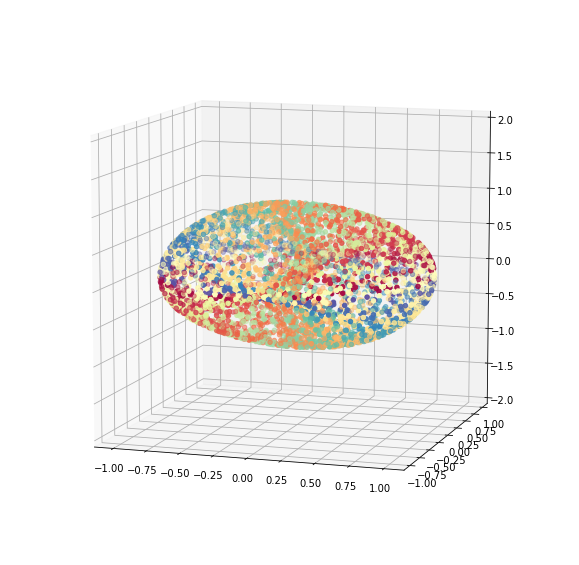

In [130]:
# plot first three variables
fig = plt.figure(figsize=(10, 10))

X, color = S3_torus(5000, noise=0, uniform=False)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
ax.set_zlim3d(-2, 2)
plt.show()

Code sourced from [wikipedia](https://en.wikipedia.org/wiki/Lorenz_96_model).

In [62]:
from scipy.integrate import odeint

def Lorenz96_attractor(n_samples, noise=0, uniform=True, dim = 36, F = 8):

    def Lorenz96(x,t):
        # compute state derivatives
        d = np.zeros(dim)
        # first the 3 edge cases: i=1,2,N
        d[0] = (x[1] - x[dim-2]) * x[dim-1] - x[0]
        d[1] = (x[2] - x[dim-1]) * x[0]- x[1]
        d[dim-1] = (x[0] - x[dim-3]) * x[dim-2] - x[dim-1]
        # then the general case
        for i in range(2, dim-1):
            d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
        # add the forcing term
        d = d + F

        # return the state derivatives
        return d

    x0 = F*np.ones(dim) # initial state (equilibrium)
    x0[19] += 0.01 # add small perturbation to 20th variable
    t = np.arange(0.0, 30.0, 0.003)
    
    if uniform:
        indices = range(0, 10000, int(10000/n_samples))
    else:
        indices = np.random.choice(10000, n_samples, replace=False)
    
    color = t[indices]/30
    X = odeint(Lorenz96, x0, t)[indices]
    if noise != 0:
        X = np.random.normal(X, noise)

    return X, color

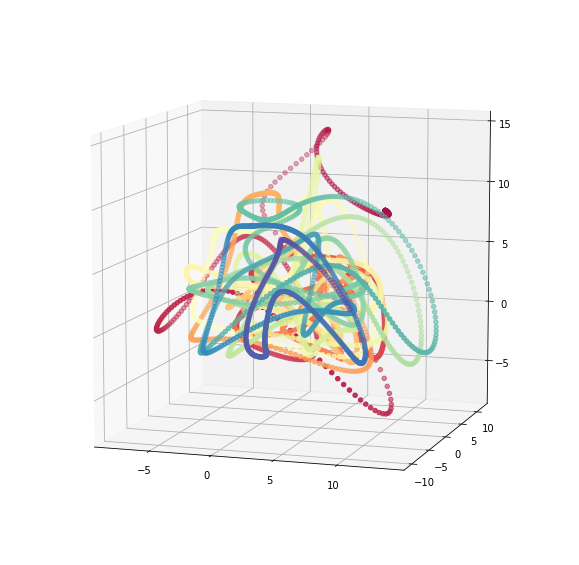

In [66]:
# plot first three variables
fig = plt.figure(figsize=(10, 10))

X, color = Lorenz96_attractor(5000, noise=0, uniform=True)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -72)
plt.show()

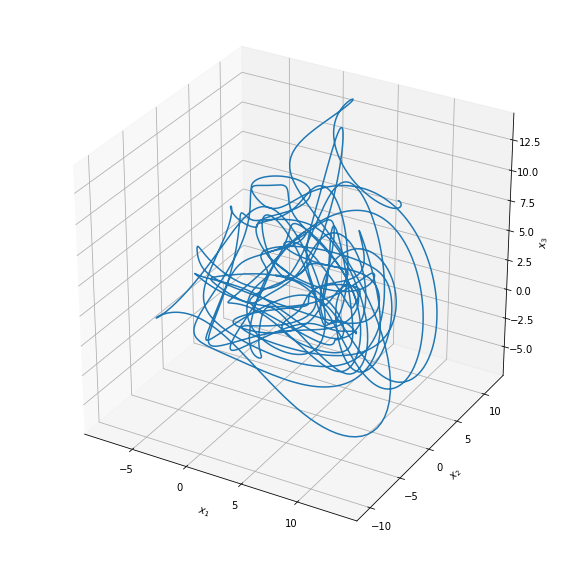

In [69]:
# plot first three variables
X, _ = Lorenz96_attractor(5000, noise=0, uniform=True)
# this only works with uniform sampling
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

## Dimensional Reduction

### Linear Methods
This class of [algorithms](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) attempts to approximate the data distribution with a low rank linear subspace within some (possibly enriched) feature space.  Nonlinearities may be accounted for using the [kernel trick]().  Algorithms of this type attempt to solve a [matrix factorization](http://scikit-learn.org/stable/modules/decomposition.html#decompositions) problem, given some regularization scheme on the factors i.e. L1 (SparsePCA), L2 (PCA), Linf (RobustPCA), Gaussian (PPCA), Dirichlet (LDA), Non-Negative (NMF), etc.

In [45]:
from sklearn import decomposition

### Manifold Learning Methods
This class of [algorithms](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) assumes the [manifold](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction) [hypothesis](colah.github.io/posts/2014-03-NN-Manifolds-Topology/), where high dimensional data lies on a low dimensional subspace with smooth geometric properties.  We approximate this geometry with a nearest neighbor graph, or a fuzzy nearest neighbor graph in the cases of [t-SNE](https://distill.pub/2016/misread-tsne/) and [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html).

In [46]:
from sklearn import manifold
from umap import UMAP

### Deep Representation Learning
Data presentation here is extracted from a hidden representation of a trained deep neural network.

#### VAE

We perform unsupervised learning of a [generator-inference model](https://arxiv.org/pdf/1312.6114.pdf) of the data distribution to perform lossy compression.  Data compresion most closely resembles [kernel](http://jmlr.csail.mit.edu/papers/volume6/lawrence05a/lawrence05a.pdf) [PPCA](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bishop-ppca-jrss.pdf) with a learned piecewise linear kernel (linear combinaltions of the ReLU activation).

#### Classifier

We perform supervised learning on lableled data, and sample from a low dimensional hidden layer representation.

## Examples

In [47]:
from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([-1])")

<IPython.core.display.Javascript object>

In [49]:
import warnings; warnings.simplefilter('ignore')

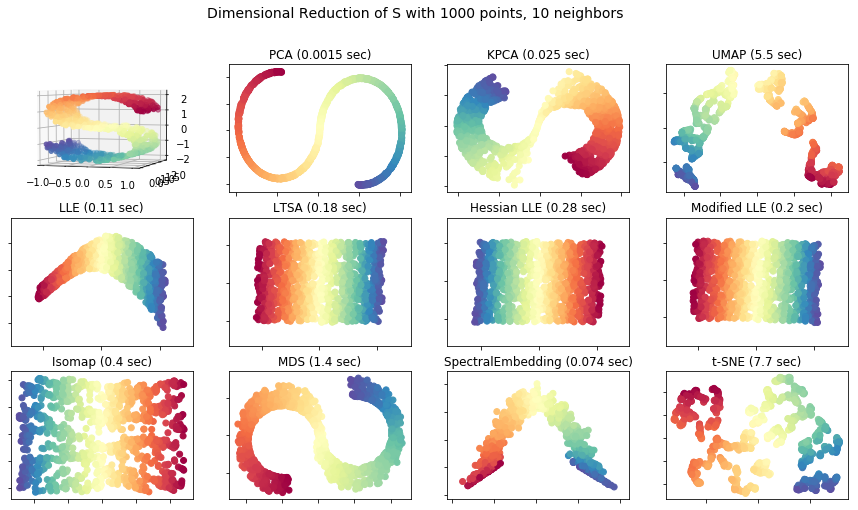

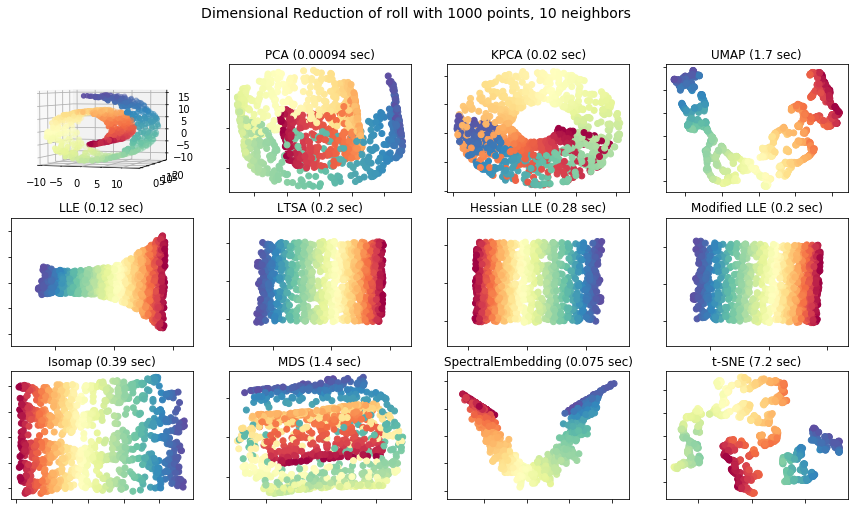

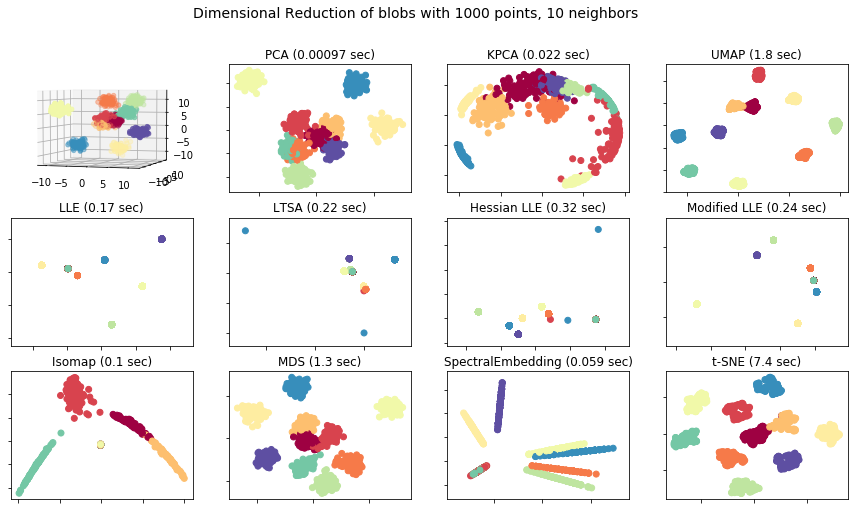

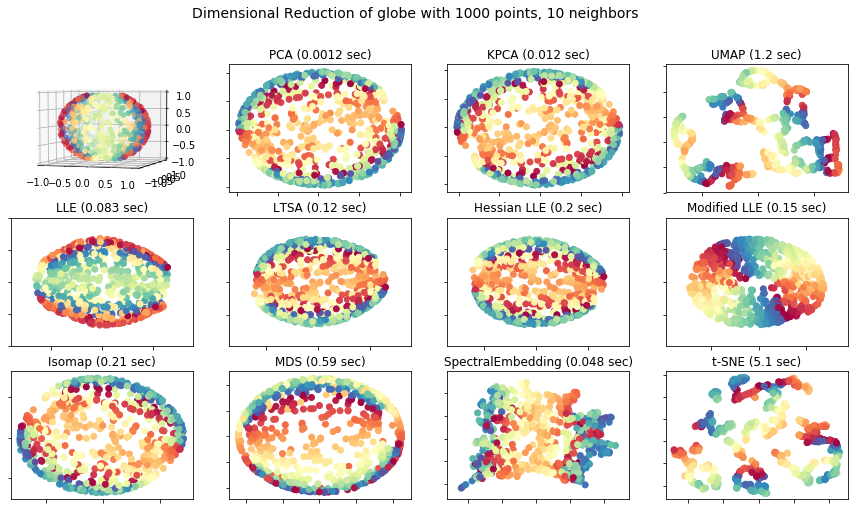

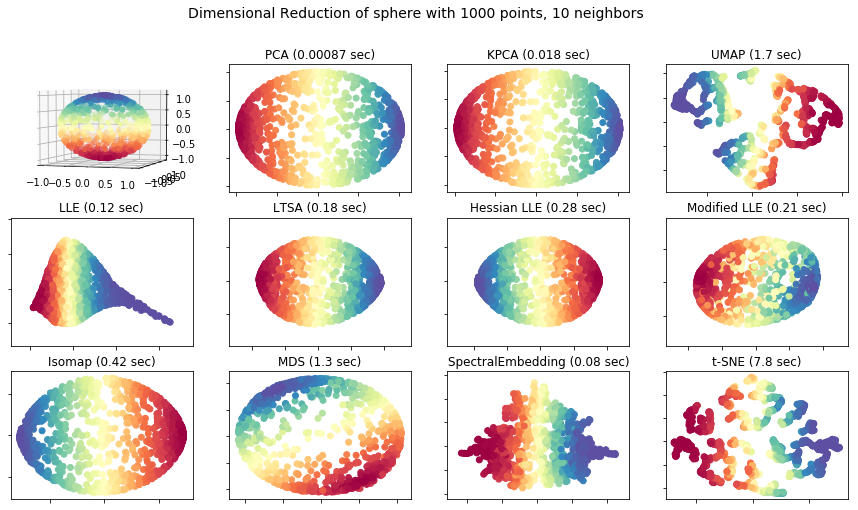

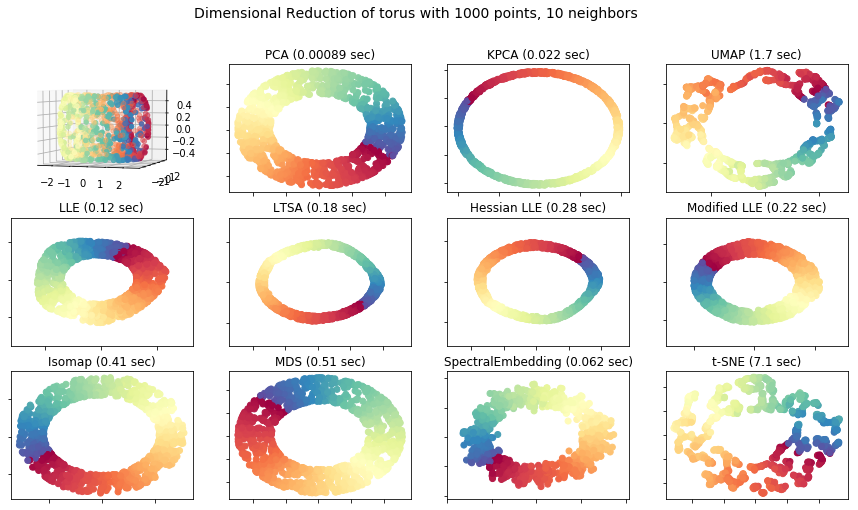

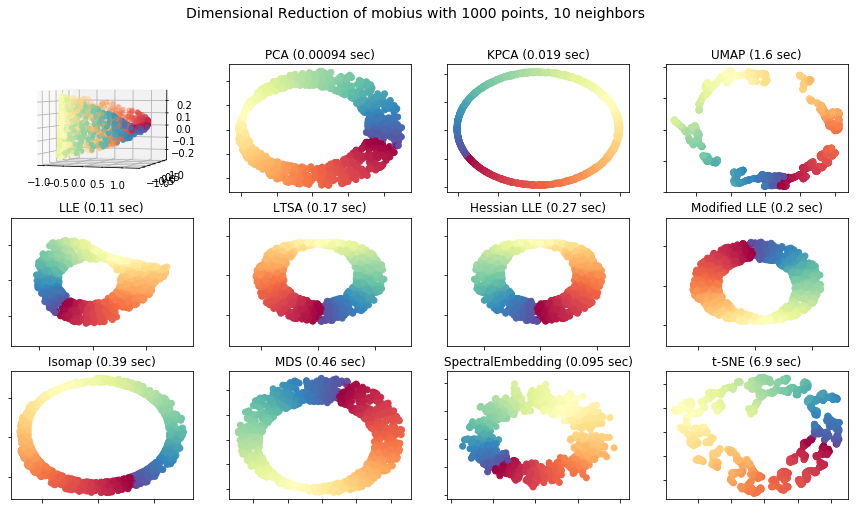

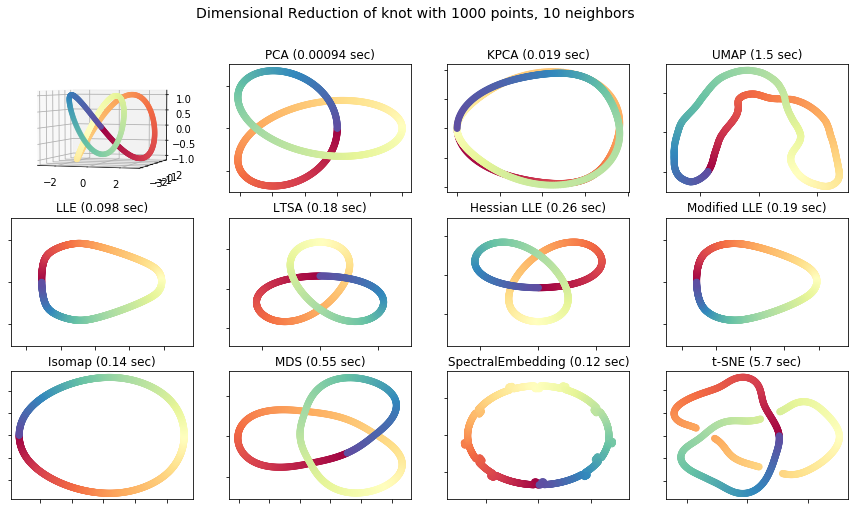

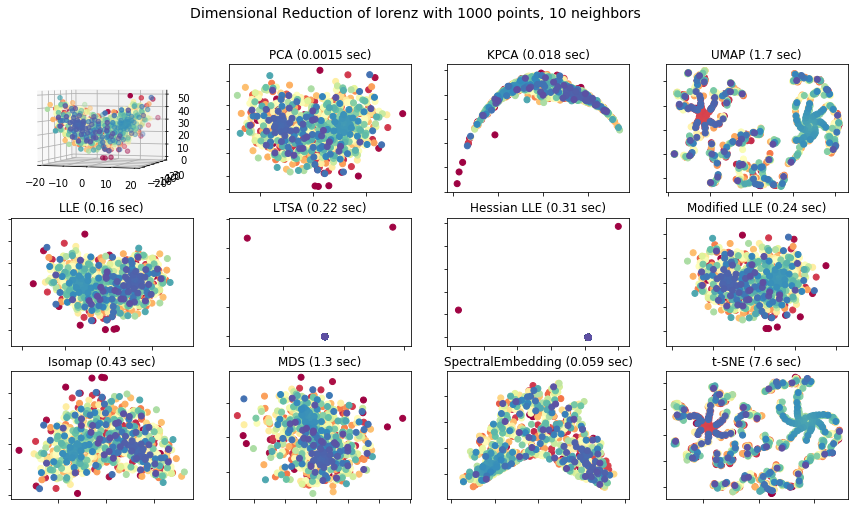

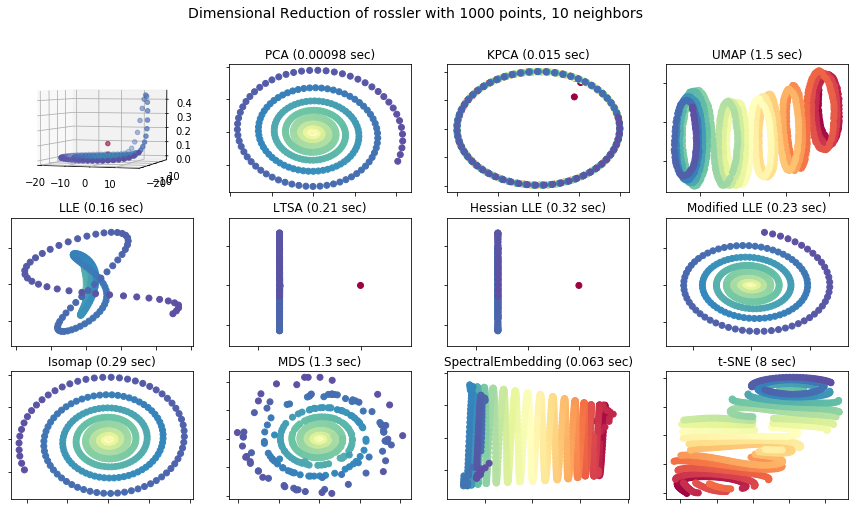

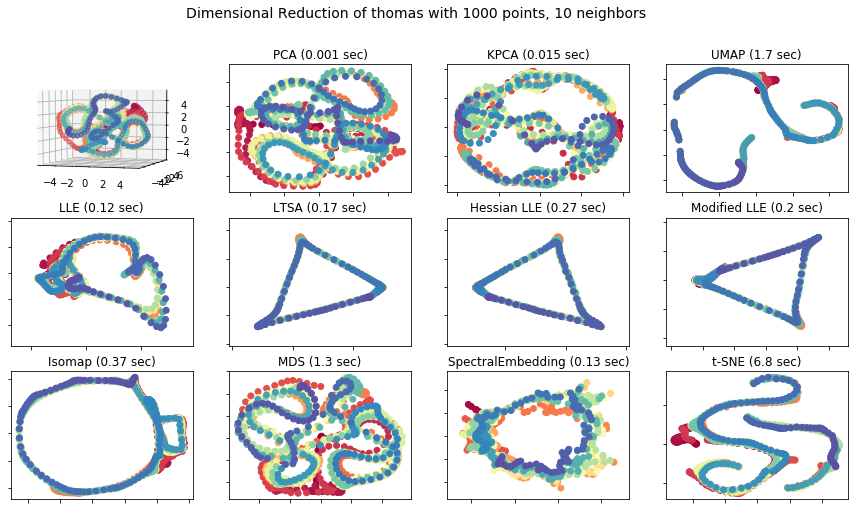

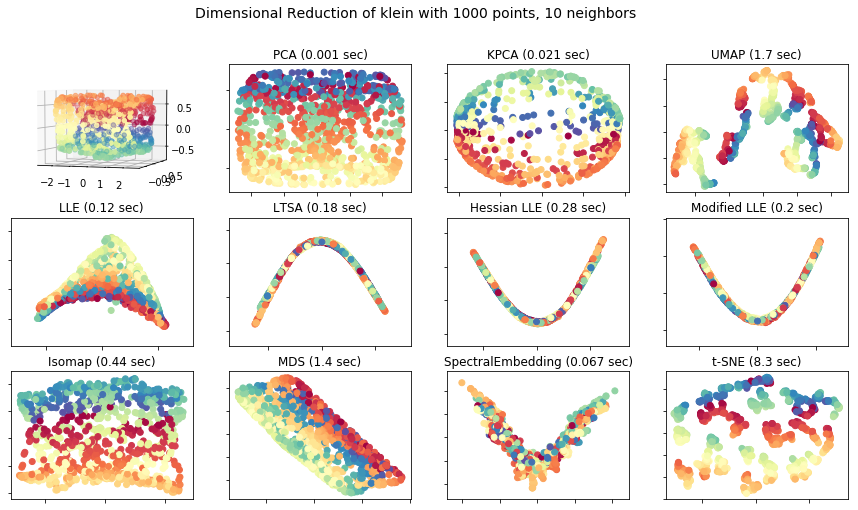

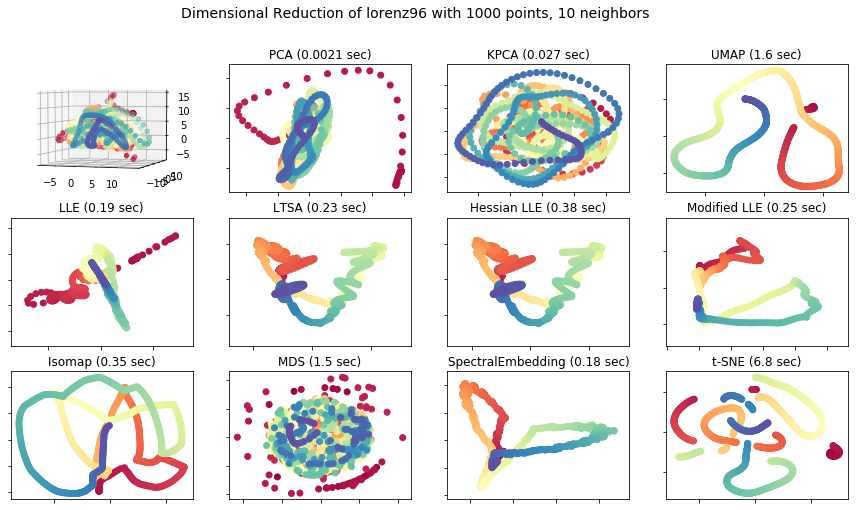

In [50]:
show_example('S')
show_example('roll')
show_example('blobs')
show_example('globe')
show_example('sphere')
show_example('torus')
show_example('mobius')
show_example('knot')
show_example('lorenz')
show_example('rossler')
show_example('thomas')
show_example('klein')
show_example('lorenz96')

# Method Comparison Code
This code is remodified from sklearn [sample code](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html).

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

def plot(data, color, algo, title, subplot):
    t0 = time()
    Y = algo.fit_transform(data)
    t1 = time()
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (title, t1 - t0))
    subplot.xaxis.set_major_formatter(NullFormatter())
    subplot.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

def show_example(shape='S'):
    # Next line to silence pyflakes. This import is needed.
    Axes3D

    n_points = 1000
    n_neighbors = 10
    n_components = 2
    
    if shape == 'S':
        X, color = ds.make_s_curve(n_points)
    elif shape == 'roll':
        X, color = ds.make_swiss_roll(n_points)
    elif shape == 'blobs':
        X, color = ds.make_blobs(n_points, n_features=3, centers=8)
    elif shape == 'globe':
        X, color = globe(n_points)
    elif shape == 'sphere':
        X, color = sphere(n_points)
    elif shape == 'torus':
        X, color = torus(n_points)
    elif shape == 'mobius':
        X, color = mobius_strip(n_points)
    elif shape == 'knot':
        X, color = trefoil_knot(n_points)
    elif shape == 'lorenz':
        X, color = lorenz_attractor(n_points)
    elif shape == 'rossler':
        X, color = rossler_attractor(n_points)
    elif shape == 'thomas':
        X, color = thomas_attractor(n_points)
    elif shape == 'klein':
        X, color = klein_bottle(n_points)
    elif shape == 'lorenz96':
        X, color = Lorenz96_attractor(n_points)
        
    
    if shape in ['blobs', 'lorenz', 'rossler']:
        eigen_solver = 'dense'
    else:
        eigen_solver = 'auto'    
    
    algorithms = (
        ("PCA", decomposition.PCA(n_components=n_components)),
        ("KPCA", decomposition.KernelPCA(n_components=n_components, 
                                         kernel='cosine', gamma=10)),
        ("UMAP", UMAP(n_components=n_components, n_neighbors=n_neighbors)),
        ("LLE", manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                              eigen_solver=eigen_solver,
                                              method='standard')),
        ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                              eigen_solver=eigen_solver,
                                              method='ltsa')),
        ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                              eigen_solver=eigen_solver,
                                              method='hessian')),
        ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                              eigen_solver=eigen_solver,
                                              method='modified')),
        ("Isomap", manifold.Isomap(n_neighbors, n_components)),
        ("MDS", manifold.MDS(n_components, max_iter=100, n_init=1)),
        ("SpectralEmbedding", manifold.SpectralEmbedding(
            n_components=n_components, n_neighbors=n_neighbors)),
        ("t-SNE", manifold.TSNE(n_components=n_components, init='pca', 
                                perplexity=n_neighbors, random_state=0))
    )
    
    fig = plt.figure(figsize=(15, 8))
    plt.suptitle("Dimensional Reduction of %s with %i points, %i neighbors"
                 % (shape, 1000, n_neighbors), fontsize=14)
    
    ax = fig.add_subplot(3, 4, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
    
    for i, (title, algo) in enumerate(algorithms):
        ax = fig.add_subplot(3, 4, 2+i)
        plot(data=X, color=color, algo=algo, title=title, subplot=ax)
         
    
    plt.show()

